In [ ]:
#install yfinance - pip install yfinance

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [4]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [6]:
infy = yf.Ticker("INFY.NS")

In [7]:
infy = infy.history(period="max")

In [6]:
infy.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-01-01 00:00:00+05:30,0.508630,0.509754,0.506130,0.509754,204800,0.0,0.0
1996-01-02 00:00:00+05:30,0.508630,0.511130,0.507693,0.507693,204800,0.0,0.0
1996-01-03 00:00:00+05:30,0.511129,0.511129,0.511129,0.511129,102400,0.0,0.0
1996-01-04 00:00:00+05:30,0.506130,0.508630,0.506130,0.507755,307200,0.0,0.0
1996-01-05 00:00:00+05:30,0.501756,0.501756,0.501756,0.501756,51200,0.0,0.0


In [7]:
infy.index

DatetimeIndex(['1996-01-01 00:00:00+05:30', '1996-01-02 00:00:00+05:30',
               '1996-01-03 00:00:00+05:30', '1996-01-04 00:00:00+05:30',
               '1996-01-05 00:00:00+05:30', '1996-01-08 00:00:00+05:30',
               '1996-01-09 00:00:00+05:30', '1996-01-10 00:00:00+05:30',
               '1996-01-11 00:00:00+05:30', '1996-01-12 00:00:00+05:30',
               ...
               '2025-01-21 00:00:00+05:30', '2025-01-22 00:00:00+05:30',
               '2025-01-23 00:00:00+05:30', '2025-01-24 00:00:00+05:30',
               '2025-01-27 00:00:00+05:30', '2025-01-28 00:00:00+05:30',
               '2025-01-29 00:00:00+05:30', '2025-01-30 00:00:00+05:30',
               '2025-01-31 00:00:00+05:30', '2025-02-03 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Date', length=7308, freq=None)

In [8]:
infy_train = infy.loc["2010-01-01":"2020-01-01"].copy()

In [9]:
infy_train

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00+05:30,235.767660,237.574309,234.439777,236.002533,4069264,0.0,0.0
2010-01-05 00:00:00+05:30,236.671011,237.637564,234.873404,236.792969,6895528,0.0,0.0
2010-01-06 00:00:00+05:30,242.361940,242.361940,232.615079,233.337738,6817288,0.0,0.0
2010-01-07 00:00:00+05:30,233.653899,233.653899,227.475147,228.093933,10892600,0.0,0.0
2010-01-08 00:00:00+05:30,227.547421,227.935855,222.037142,222.597198,12649312,0.0,0.0
...,...,...,...,...,...,...,...
2019-12-26 00:00:00+05:30,656.853088,659.141295,651.962572,654.116211,3821806,0.0,0.0
2019-12-27 00:00:00+05:30,654.834061,661.788448,654.026433,661.294922,3399094,0.0,0.0
2019-12-30 00:00:00+05:30,660.532212,662.192324,652.590772,657.660767,5368416,0.0,0.0


<Axes: xlabel='Date'>

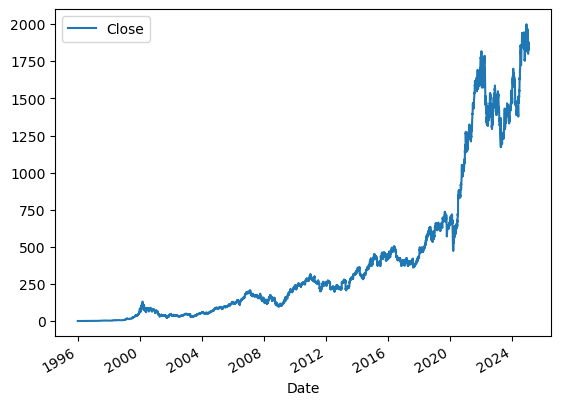

In [10]:
infy.plot.line(y="Close", use_index = True)

In [11]:
#Data processing
scaler = MinMaxScaler(feature_range=(0,1))

In [12]:
scaled_data = scaler.fit_transform(infy_train['Close'].values.reshape(-1,1))

In [13]:
#No of days to look back
pred_days = 60

In [14]:
x_train = []
y_train = []

for x in range(pred_days, len(scaled_data)):
    x_train.append(scaled_data[x-pred_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [15]:
#Using LSTM Model

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
          
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

C:\Users\APOORV\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 0.0371
Epoch 2/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0030
Epoch 3/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0024
Epoch 4/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0027
Epoch 5/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0028
Epoch 6/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0021
Epoch 7/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0026
Epoch 8/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0025
Epoch 9/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0019
Epoch 10/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0016
Epoch 11/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0020
Epoch 12/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0016
Epoch 13/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0017
Epoch 14/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0017
Epoch 15/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0016
Epo

In [16]:
#Test set
test_infy = infy.loc["2020-01-01":].copy()

test_infy

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-01 00:00:00+05:30,659.545142,664.031844,657.346648,661.205200,2112415,0.0,0.0
2020-01-02 00:00:00+05:30,663.044719,664.749632,655.865997,659.275879,5658200,0.0,0.0
2020-01-03 00:00:00+05:30,658.558097,671.210574,658.558097,669.415894,7882938,0.0,0.0
2020-01-06 00:00:00+05:30,669.505657,676.415189,660.891211,662.999939,6519403,0.0,0.0
2020-01-07 00:00:00+05:30,662.237188,666.364932,650.661475,653.174072,7899363,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-28 00:00:00+05:30,1830.000000,1863.500000,1824.900024,1829.750000,6999495,0.0,0.0
2025-01-29 00:00:00+05:30,1845.000000,1888.650024,1840.500000,1881.250000,5145155,0.0,0.0
2025-01-30 00:00:00+05:30,1873.150024,1887.199951,1844.000000,1859.949951,7336056,0.0,0.0


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step


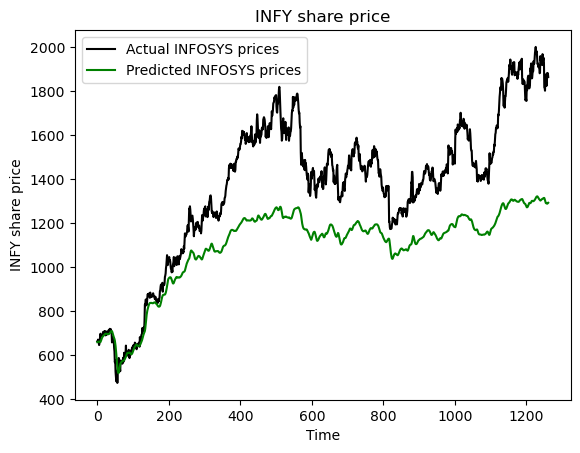

In [19]:
actual_prices = test_infy['Close'].values

total_dataset = pd.concat((infy_train['Close'], test_infy['Close']), axis=0)
model_inputs = total_dataset[len(total_dataset) - len(test_infy) - pred_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)


#Predictions

x_test = []

for x in range(pred_days, len(model_inputs)):
    x_test.append(model_inputs[x-pred_days:x, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


#visualizing

plt.plot(actual_prices, color="black", label="Actual INFOSYS prices")
plt.plot(predicted_prices, color="green", label="Predicted INFOSYS prices")
plt.title("INFY share price")
plt.xlabel("Time")
plt.ylabel("INFY share price")
plt.legend()
plt.show()

# Using Other models

In [8]:
infy["Tomorrow"] = infy["Close"].shift(-1)
infy["Target"] = (infy["Tomorrow"] > infy["Close"]).astype(int)

infy_train1 = infy.loc["2010-01-01":].copy()

In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = infy.iloc[:-100]
test = infy.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [10]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [11]:
preds = pd.Series(preds, index=test.index)

In [12]:
precision_score(test["Target"], preds)

0.6

<Axes: xlabel='Date'>

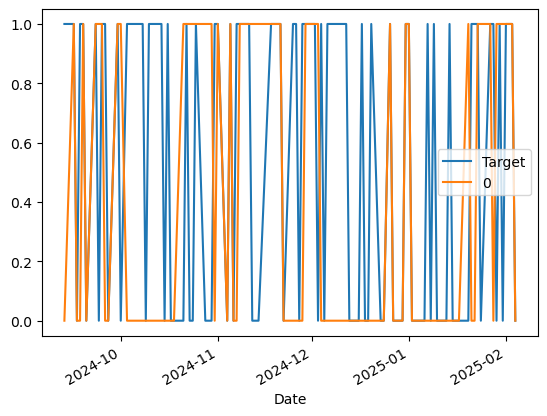

In [13]:
comb = pd.concat([test["Target"], preds], axis = 1)
comb.plot()

In [14]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [15]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [16]:
predictions = backtest(infy_train1, model, predictors)

In [17]:
precision_score(predictions["Target"], predictions["Predictions"])

0.52